In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import dirname, join as pjoin
from scipy.io import readsav

%config InlineBackend.figure_format='svg'
plt.style.use('default')
plt.style.use('../main/multi_py/Bergemann2020.mplstyle')

In [2]:
sav_fname = pjoin('../../data/spectra/1631885174310_iag_sun_Si.sav')
sav_data = readsav(sav_fname)
f = open('../../data/spectra/sun_kpnomu1_6000_8000A.txt')
obs_spec2 = np.loadtxt(fname=f)

# simulation has been run with mus: 1, 0.9, 0.8, 0.6, 0.4, 0.2
# specify the indecies corresponding to these angles in the solar data
sol_mu_ind = [0, 4, 5, 7, 9, 11]

# get the flux(intensity) and wavelengths corresponding to these angles
sol_fluxes = [sav_data['iag_sun'].flux[0][ang] for ang in sol_mu_ind]
sol_lams = [sav_data['iag_sun'].wave[0][ang] for ang in sol_mu_ind]
sol_mus = [sav_data['iag_sun'].mu[0][ang] for ang in sol_mu_ind]

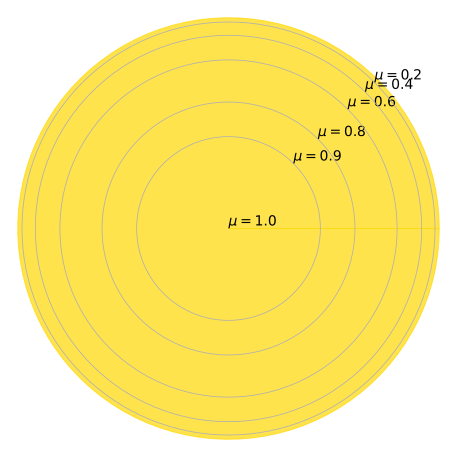

In [37]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='polar')
# plt.polar(0,0,'go')

labs = ['$\mu = $' + str(s) for s in sol_mus]
# plt.polar(1,0,'go')

azi_angles = [np.arccos(sol_mu) for sol_mu in sol_mus]
contours = np.sin(azi_angles)
# rmax = np.arccos(0)
# ax.set_rgrids(contours, labels=[f'$\mu = ${sol_mu}' for sol_mu in sol_mus])
ax.set_rgrids(contours, labels=labs, angle=45, fontsize=14)

ax.set_thetagrids([])
ax.fill_between(np.linspace(0, np.pi*2, 100),0,1, color='gold', alpha=0.7)
# ax.scatter(0,0)
# ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/6.0))
# ax.set_rmax(rmax)
# ax.set_ylim(0,4)
# ax.set_yticks(contours)

ax.spines['polar'].set_visible(False)

# plt.savefig("../plots/polar_coordinates_05.png")


# plt.show()


In [13]:
contours

array([0.        , 0.43588993, 0.6       , 0.8       , 0.9165151 ,
       0.9797959 ], dtype=float32)

In [4]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
points = [[[0, 90, 180, 270], c] for c in contours]

In [ ]:
points

[[[0, 90, 180, 270], 0.0],
 [[0, 90, 180, 270], 0.43588993],
 [[0, 90, 180, 270], 0.6],
 [[0, 90, 180, 270], 0.8],
 [[0, 90, 180, 270], 0.9165151],
 [[0, 90, 180, 270], 0.9797959]]

In [ ]:
plot = px.scatter_polar(df, r = contours, 
                        theta = 'total_bill')

## Calculate mu angles

In [ ]:
mu_zs = [1.0, 0.9, 0.8, 0.6, 0.4, 0.2]
muzout = [1.0]
muxout = [0]
muyout = [0]

for mu_z in mu_zs[1:]:
    conjugate = np.round(np.sqrt(1-mu_z**2),4)
    if mu_z == 0.4:
        conjugate += 0.0001
    for i in range(4):
        muzout.append(mu_z)
    muxout.extend((conjugate, 0.0, -conjugate, 0.0))
    muyout.extend((0.0, conjugate, 0.0, -conjugate))

print('muxout = ',*muxout)
print('muyout = ',*muyout)
print('muzout = ',*muzout)

muxout =  0 0.4359 0.0 -0.4359 0.0 0.6 0.0 -0.6 0.0 0.8 0.0 -0.8 0.0 0.9166 0.0 -0.9166 0.0 0.9798 0.0 -0.9798 0.0
muyout =  0 0.0 0.4359 0.0 -0.4359 0.0 0.6 0.0 -0.6 0.0 0.8 0.0 -0.8 0.0 0.9166 0.0 -0.9166 0.0 0.9798 0.0 -0.9798
muzout =  1.0 0.9 0.9 0.9 0.9 0.8 0.8 0.8 0.8 0.6 0.6 0.6 0.6 0.4 0.4 0.4 0.4 0.2 0.2 0.2 0.2


In [ ]:
# muxout = np.fromstring('0.0 0.6092 0.0 -0.6092 0.0 0.7939 0.0 -0.7939 0.0 0.9057 0.0 -0.9057 0.0 0.9804 0.0 -0.9804 0.0', sep=' ')
# muyout = np.fromstring('0.0 0.0 0.6092 0.0 -0.6092 0.0 0.7939 0.0 -0.7939 0.0 0.9057 0.0 -0.9057 0.0 0.9804 0.0 -0.9804', sep=' ')
# muzout = np.fromstring('1.0 0.793 0.793 0.793 0.793 0.608 0.608 0.608 0.608 0.424 0.424 0.424 0.424 0.197 0.197 0.197 0.197', sep=' ')


In [ ]:
# for i, _ in enumerate(muxout):
#     dummy = np.sqrt(muxout[i]**2 + muyout[i]**2 + muzout[i]**2)
#     if np.abs(dummy - 1e0) > 1e-4:
#         print('error')
#     print(np.sqrt(muxout[i]**2 + muyout[i]**2 + muzout[i]**2 ) - 1)